# Model Interpretability





## Overview
The Premier League is one of the biggest soccer leagues in the world which takes place in the United Kingdom. Having over 10 million viewer EACH gameday, the stats and insights of a game play a vital role among individuals. Aiming to check the quality of the data, this notebook has used various methods to answer the questions.

##Dataset

The dataset consists of various characteristics and match statistics of football teams in the Premier League. These include:

Independent Variables: These are the features based on which analyses are conducted. They can include various match statistics such as the number of corners, fouls, shots on goal, possession percentage, pass accuracy, and other relevant metrics. Additional details might include team-specific data, manager information, and other relevant match details.

Dependent Variable: The key outcome or response variable in this dataset is the Score of a match. This represents the number of goals scored by a team in a single match.

Range of Score: The Score variable can range from 0 (indicating no goals scored) to higher values that represent the number of goals scored by a team. The exact range can be determined by exploring the dataset.

Total Observations: The dataset contains a total of  observations (or matches), each providing detailed statistics and scores.

This dataset can be used for various analyses, including predicting match outcomes, understanding the factors that contribute to a team's success, or exploring trends and patterns in team performances across the Premier League.

Link to the dataset: https://www.kaggle.com/datasets/ekrembayar/premier-league-match-reports-20192020

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=04642d1273ebf173071f4fa8b188f43e0ca5f9815fae119e969970942395b354
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
import pandas as pd


file_path = "https://raw.githubusercontent.com/chinm4y/csv/main/premierLeague%20-%20Sheet1.csv"
data = pd.read_csv(file_path)

#Checking datatypes
data.dtypes

Match_Name          object
Match_Date          object
Team                object
Team_Logo           object
Manager             object
Captain             object
Score                int64
Penalties            int64
Fouls                int64
Corners              int64
Crosses              int64
Touches              int64
Tackles              int64
Interceptions        int64
Aerials Won          int64
Clearances           int64
Offsides             int64
Goal Kicks           int64
Throw Ins            int64
Long Balls           int64
YellowCard           int64
RedCard              int64
YellowRed            int64
Possession         float64
PassingAccuracy      int64
SucPass              int64
NumofPass            int64
ShotsAccuracy      float64
SucShots             int64
NumofShots           int64
SavesAccuracy      float64
SucSaves             int64
NumofSaves           int64
dtype: object

In [ ]:
data.isnull().sum()

Match_Name         0
Match_Date         0
Team               0
Team_Logo          0
Manager            0
Captain            0
Score              0
Penalties          0
Fouls              0
Corners            0
Crosses            0
Touches            0
Tackles            0
Interceptions      0
Aerials Won        0
Clearances         0
Offsides           0
Goal Kicks         0
Throw Ins          0
Long Balls         0
YellowCard         0
RedCard            0
YellowRed          0
Possession         0
PassingAccuracy    0
SucPass            0
NumofPass          0
ShotsAccuracy      0
SucShots           0
NumofShots         0
SavesAccuracy      0
SucSaves           0
NumofSaves         0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

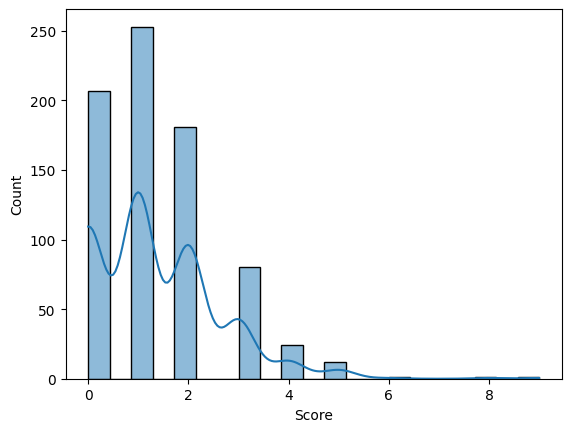

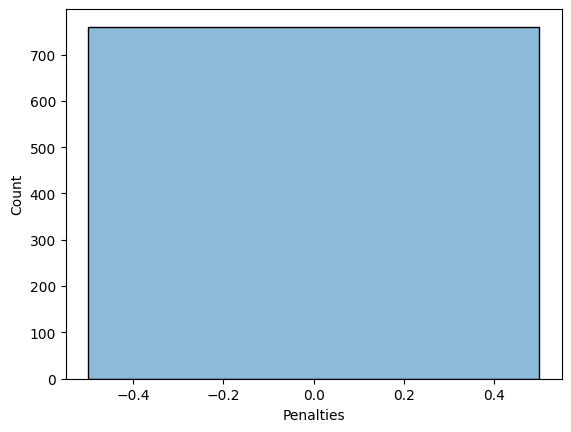

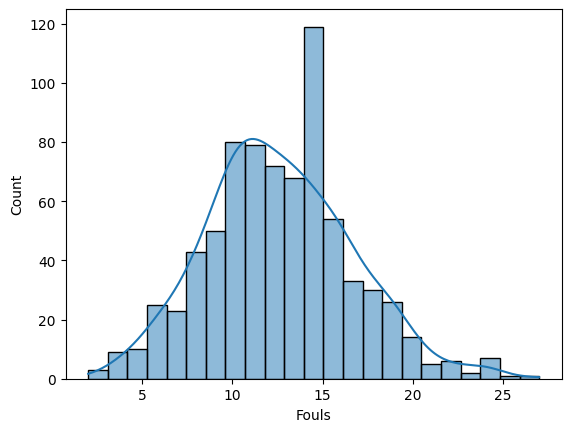

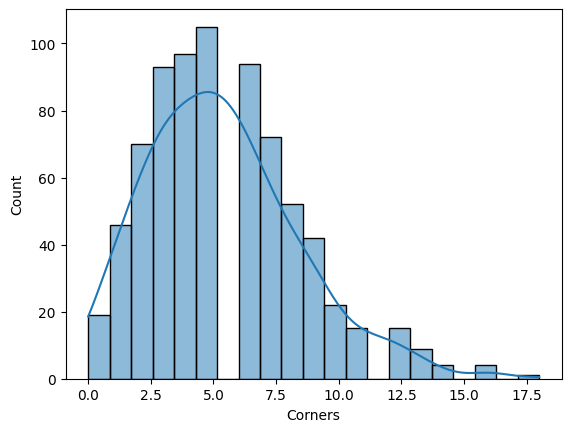

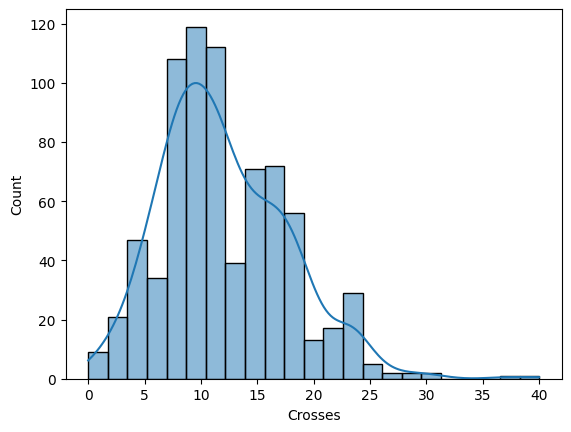

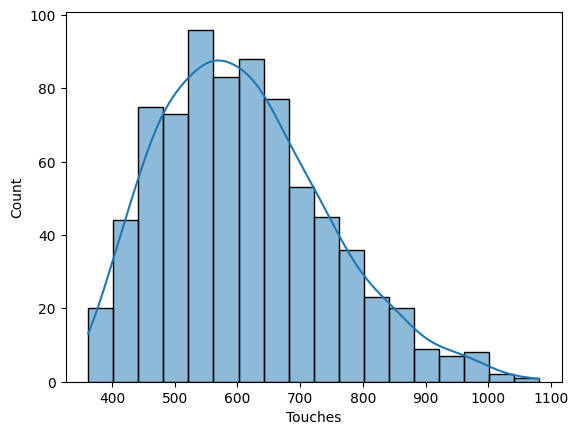

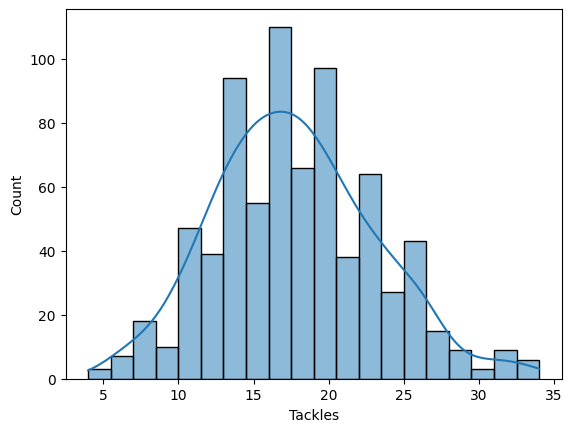

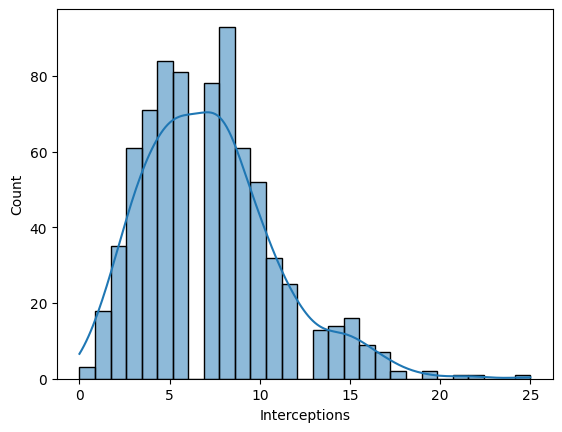

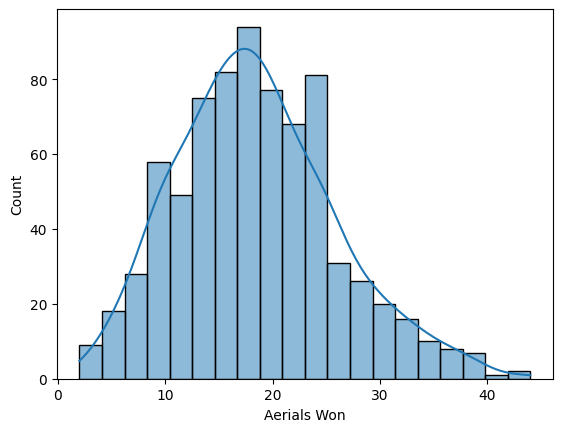

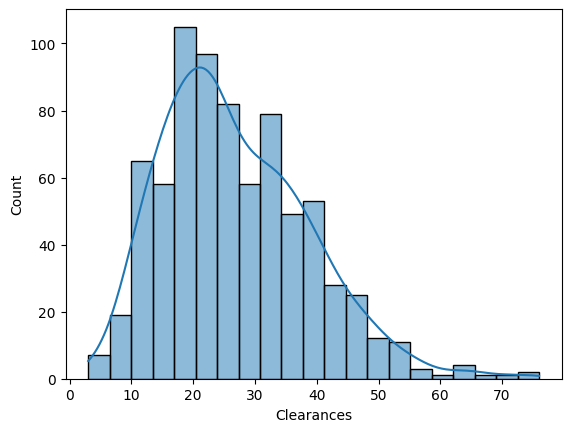

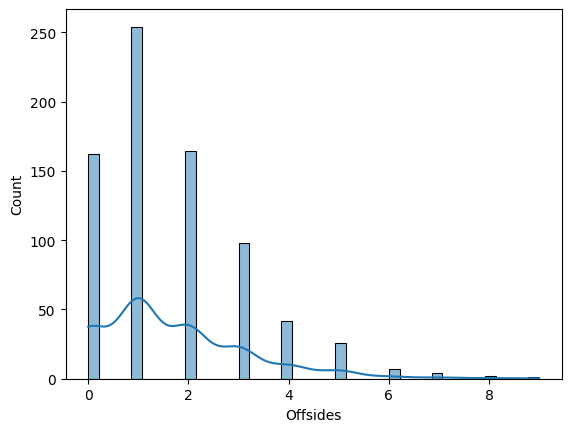

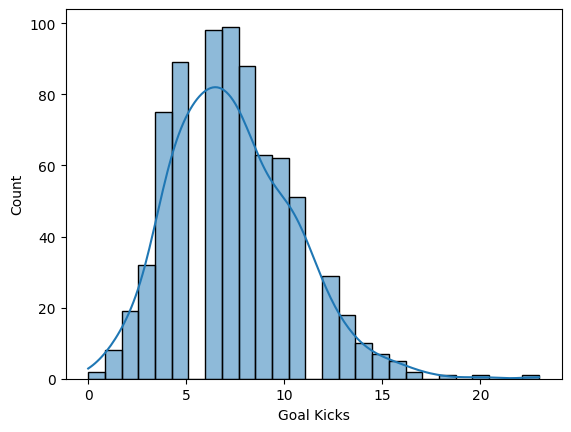

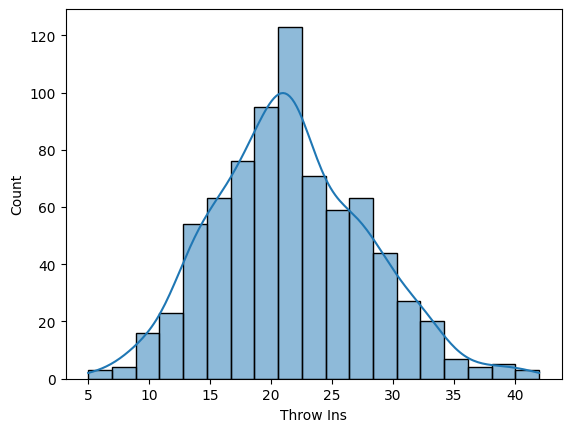

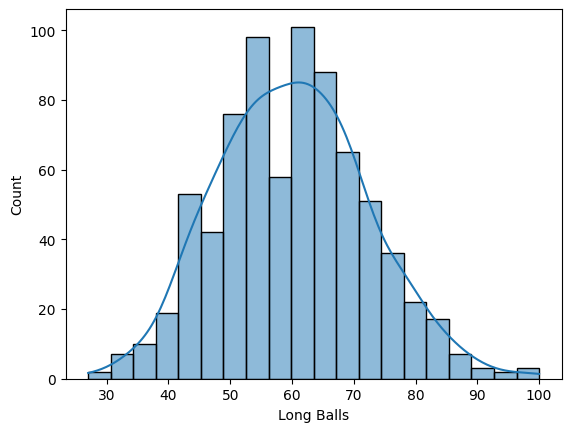

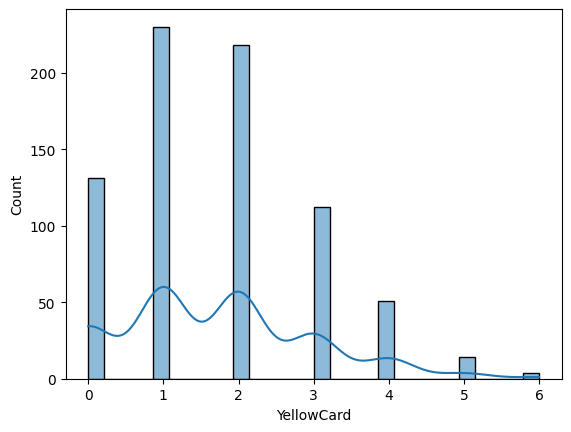

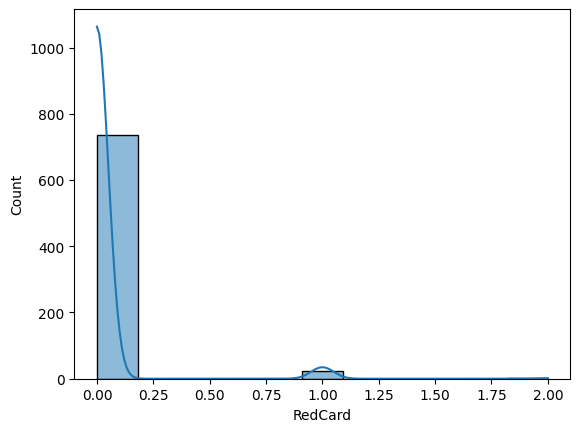

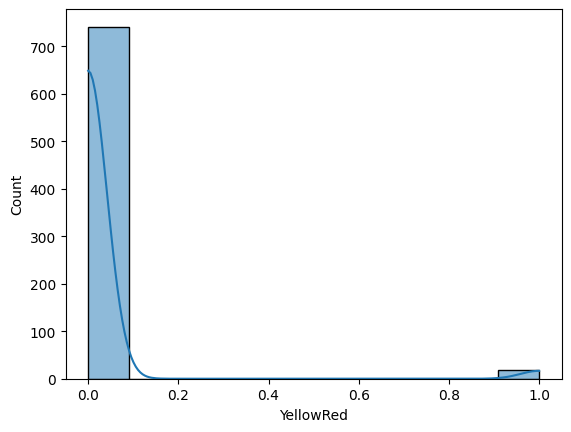

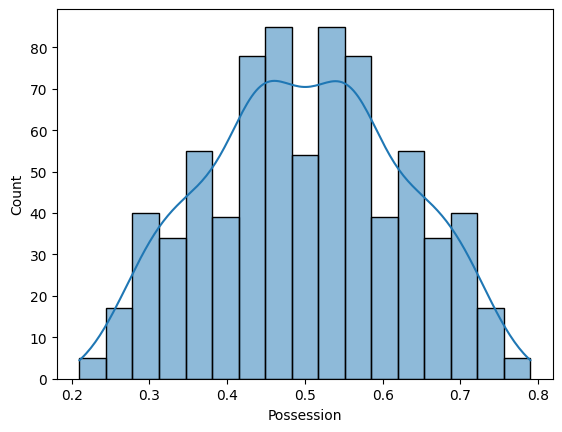

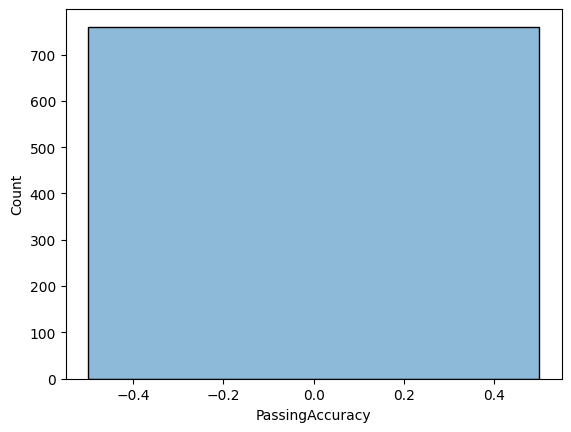

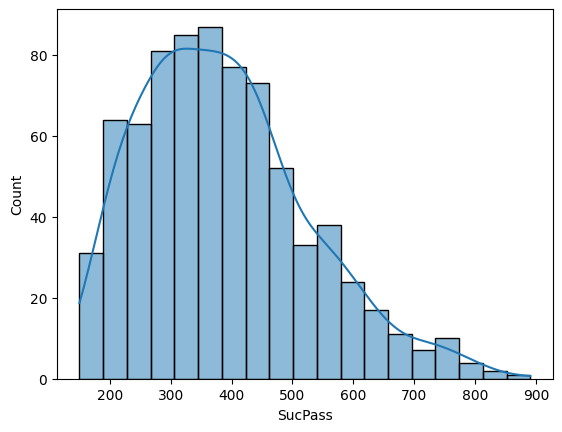

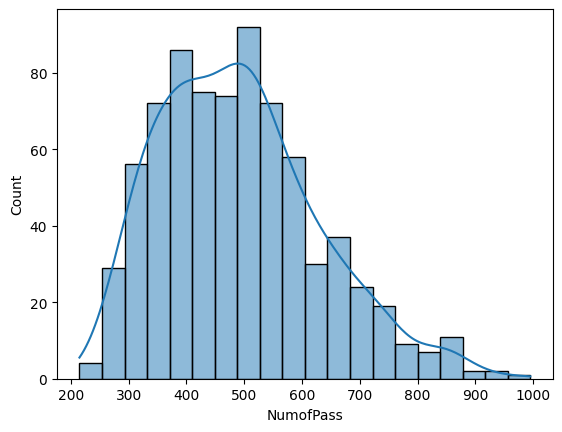

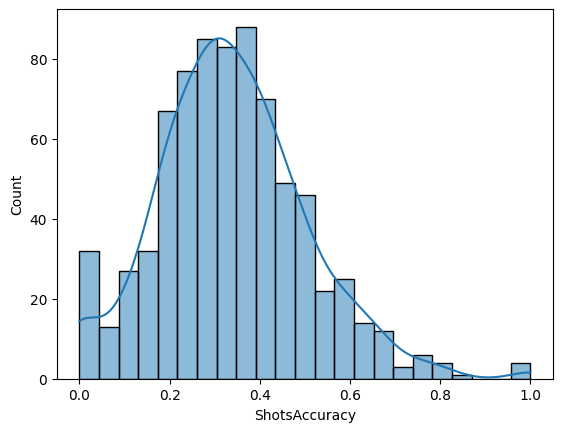

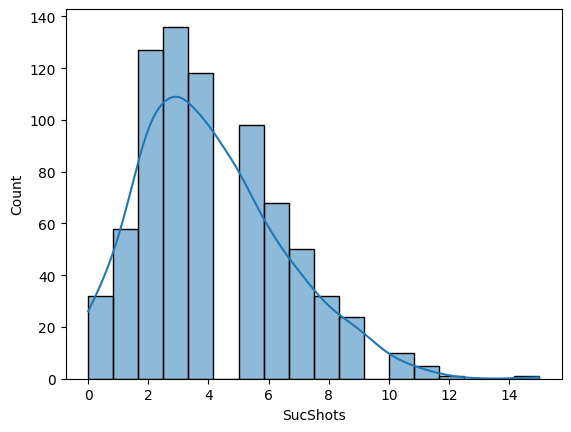

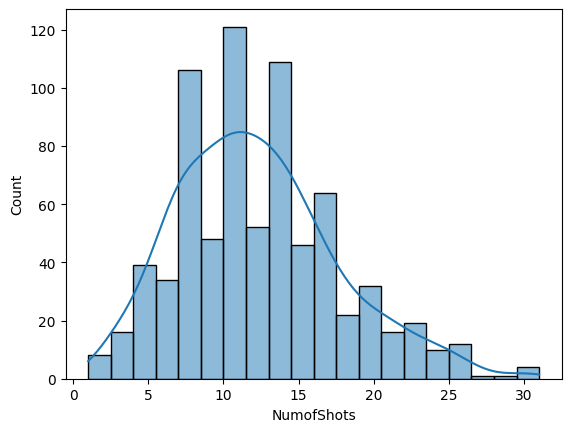

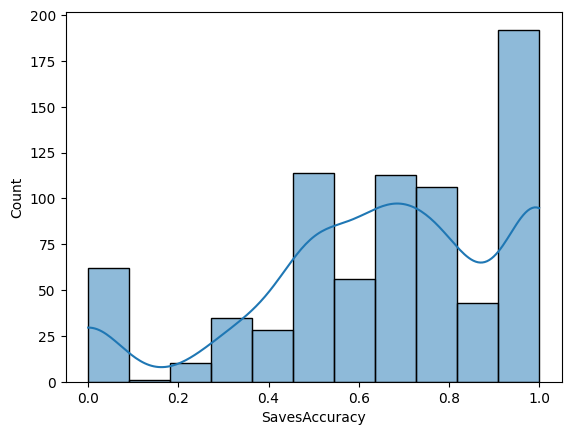

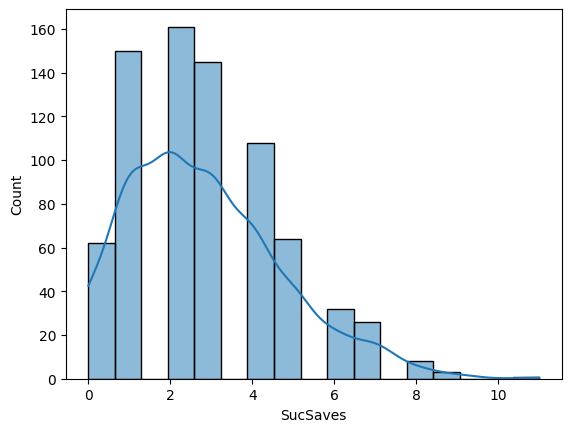

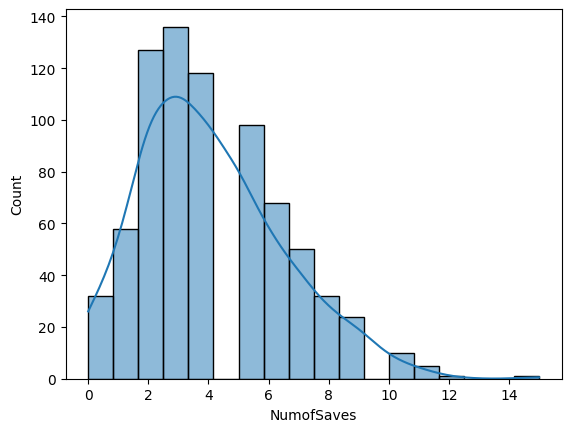

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
df_numeric = data.select_dtypes(include=['int64', 'float64'])

# Plot distributions
for column in df_numeric.columns:
    sns.histplot(df_numeric[column], kde=True)
    plt.show()

Normalising



<Figure size 800x500 with 0 Axes>

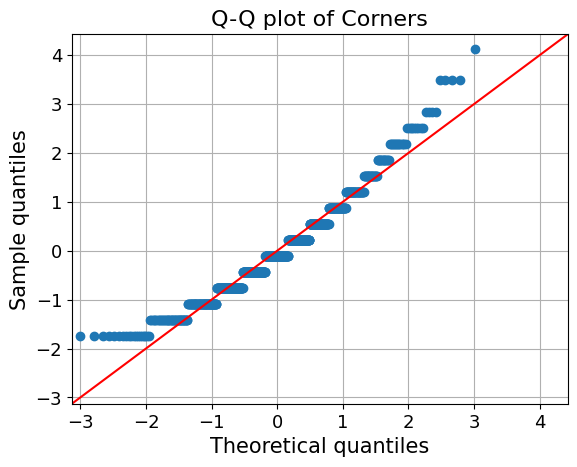

<Figure size 800x500 with 0 Axes>

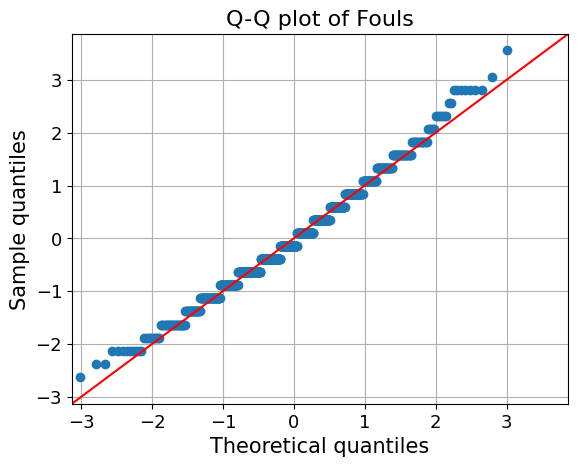

<Figure size 800x500 with 0 Axes>

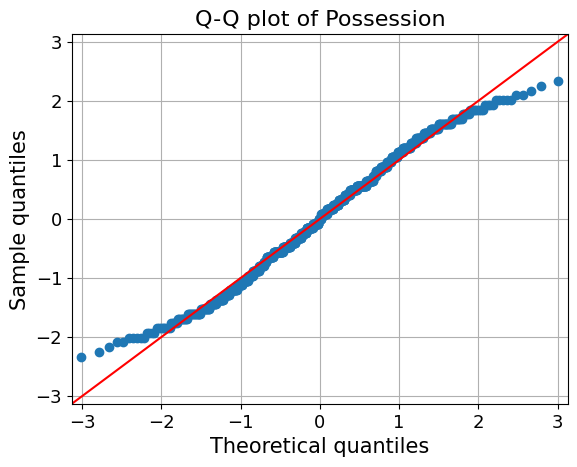

<Figure size 800x500 with 0 Axes>

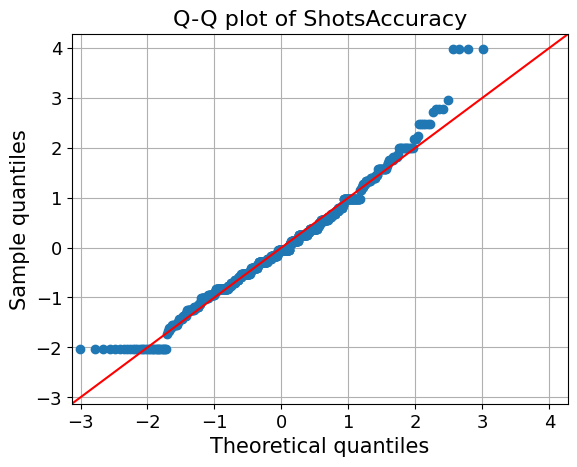

<Figure size 800x500 with 0 Axes>

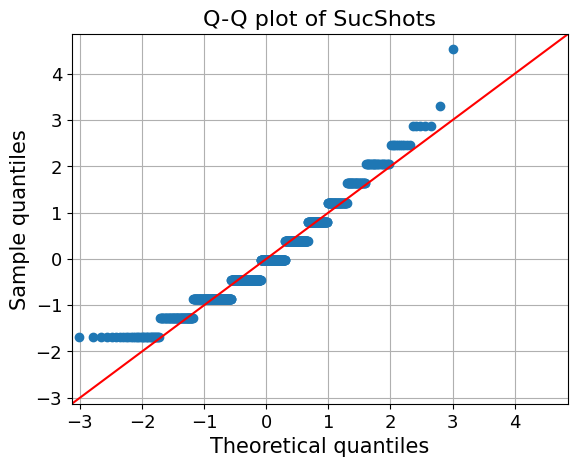

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt


data_norm = data[
    ['Corners', 'Fouls', 'Possession', 'ShotsAccuracy', 'SucShots']  # Add other numeric features as needed
]

# Plotting Q-Q plots for the selected features
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()


In [ ]:
correlation_matrix = data.corr()
score_correlation = correlation_matrix['Score'].sort_values(ascending=False)



<ipython-input-6-32b36959e11f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
data = pd.get_dummies(data)
from sklearn import preprocessing

# Creating x to store scaled values as floats
x = data[["Score"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transforming the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Running  the normalizer on the dataframe
data[["Score"]] = pd.DataFrame(x_scaled)


In [ ]:
data.head()

,Score,Penalties,Fouls,Corners,Crosses,Touches,Tackles,Interceptions,Aerials Won,Clearances,...,Captain_Steve Cook,Captain_Séamus Coleman,Captain_Timm Klose,Captain_Toby Alderweireld,Captain_Troy Deeney,Captain_Tyrone Mings,Captain_Virgil van Dijk,Captain_Wes Morgan,Captain_Willian,Captain_Étienne Capoue
0,0.444444,0,10,11,15,633,24,11,14,5,...,0,0,0,0,0,0,0,0,0,0
1,0.111111,0,12,2,5,537,17,10,4,31,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,11,1,10,531,18,4,16,18,...,0,0,0,0,0,0,0,0,0,0
3,0.555556,0,15,1,8,678,26,5,16,27,...,0,0,0,0,0,0,0,0,0,0
4,0.333333,0,6,2,7,500,22,9,30,64,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm


independent_vars = [
    'Corners', 'YellowCard', 'RedCard', 'YellowRed', 'Possession',
    'ShotsAccuracy', 'SucShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves'

]

# Adding a constant to the model
X = sm.add_constant(data[independent_vars])
y = data['Score']

#Fitting the OLS model
model = sm.OLS(y, X).fit()

#Printing out the summary statistics of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     52.34
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.57e-79
Time:                        01:45:49   Log-Likelihood:                 633.76
No. Observations:                 760   AIC:                            -1246.
Df Residuals:                     749   BIC:                            -1195.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0600      0.027      2.196      0.028       0.006       0.114
Corners          -0.0060      0.001     -4.030      0.000      -0.009      -0.003
YellowCard       -0.0053      0.003     -1.680      0.093      -0.011       0.001
RedCard          -0.0415      0.021     -2.016      0.044      -0.082      -0.001
YellowRed         0.0061      0.025      0.244      0.807      -0.043       0.055
Possession        0.0204      0.038      0.540      0.590      -0.054       0.094
ShotsAccuracy     0.0289      0.032      0.890      0.374      -0.035       0.093
SucShots          0.0336      0.002     13.782      0.000       0.029       0.038
SavesAccuracy    -0.0112      0.020     -0.547      0.585      -0.051       0.029
SucSaves          0.0191      0.006      2.979      0.003       0.007       0.032
NumofSaves       -0.0172      0.005     -3.807      0.000      -0.026      -0.008
==============================================================================
Omnibus:                       53.942   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.554
Skew:                           0.575   Prob(JB):                     6.47e-17
Kurtosis:                       4.015   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the significant value of 0.06 because predicting if the match is a winning match or a loosing match is not that critical,
1. The corners have the p walve of 0 which is less and hence it is a significant feature.
2. yellow cards have the p value of 0.09 which is more  and hence they are cnsidered to be not a significant feature
3. red cards have the p value of 0.04, a significant feature
4. yellow+red have the p value 0.8, not a significant feature.
5. possession has the p value of 0.5, not a significant feature.
6. successfull shots has the p value of 0 which is very less and is a significant feature.
7. same can be said aboout succ saves, num of saves and shot accuracy.

### 5. Analysis of Missing Data in Independent Variables
Identify and quantify missing data in independent variables.

In [ ]:
data.isnull().sum()

Score                      0
Penalties                  0
Fouls                      0
Corners                    0
Crosses                    0
                          ..
Captain_Tyrone Mings       0
Captain_Virgil van Dijk    0
Captain_Wes Morgan         0
Captain_Willian            0
Captain_Étienne Capoue     0
Length: 655, dtype: int64

No null values.

##Linear Model


---



---



In [ ]:
from sklearn.model_selection import train_test_split

#selecting features
features = [
    'Corners', 'YellowCard', 'RedCard', 'YellowRed', 'Possession',
    'ShotsAccuracy', 'SucShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves'

]

X = data[features]
y = data['Score']

# Splitting data into Training 76.5%, Validation set 13.5% and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


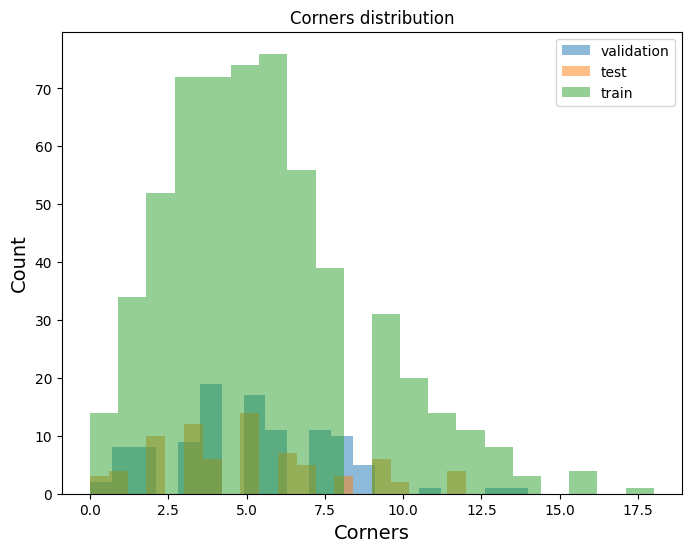

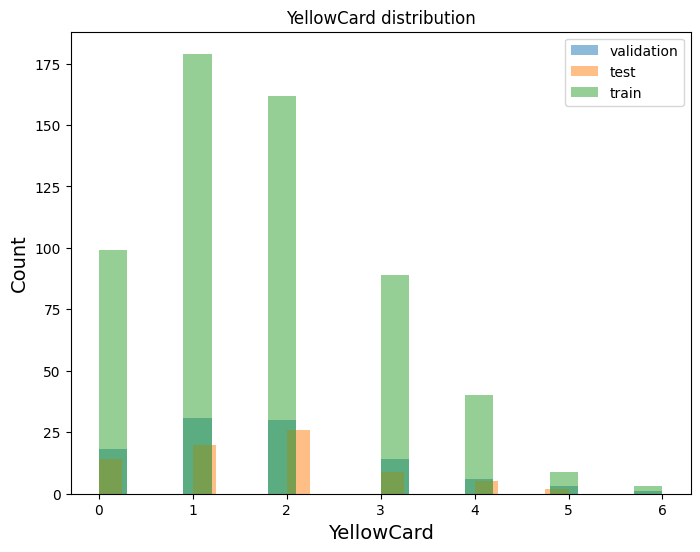

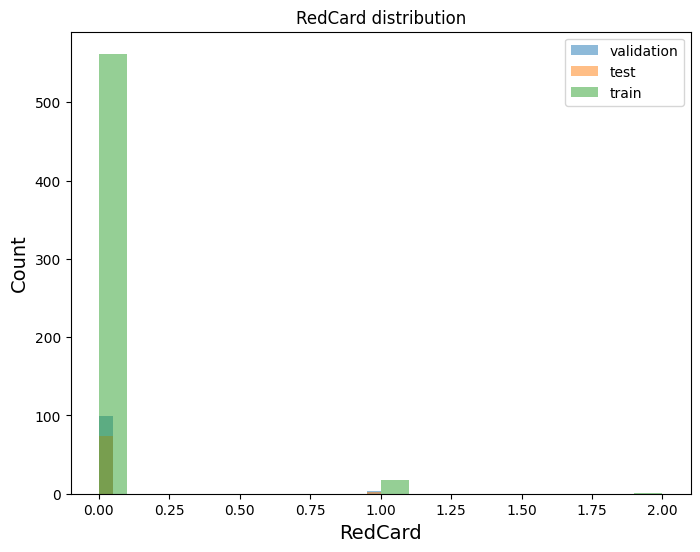

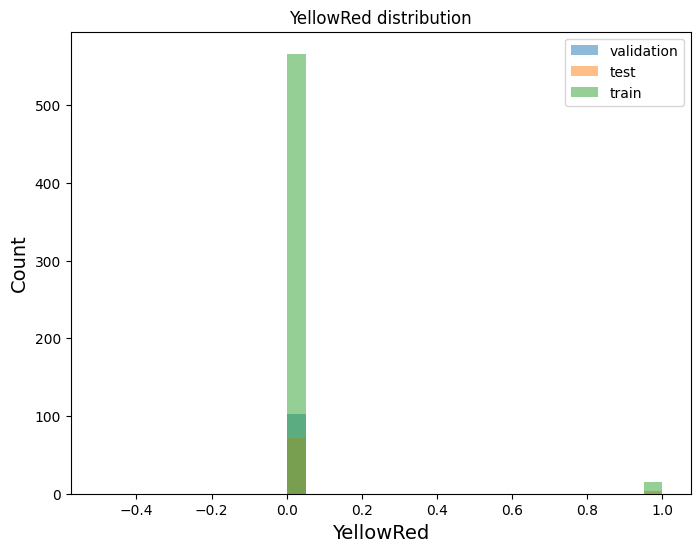

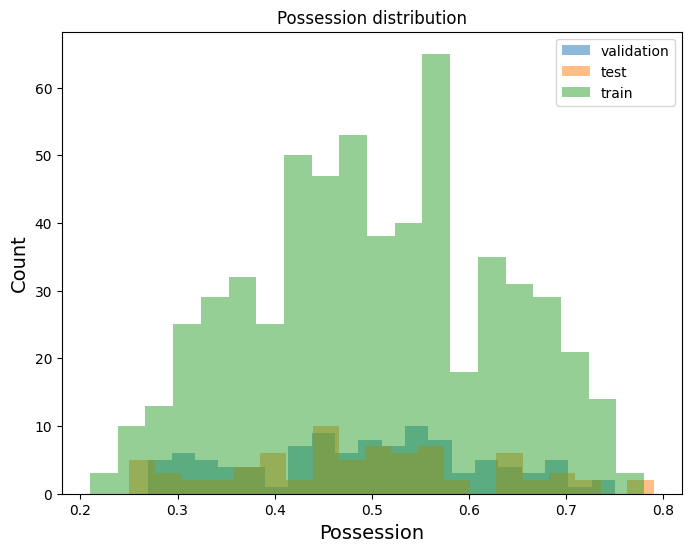

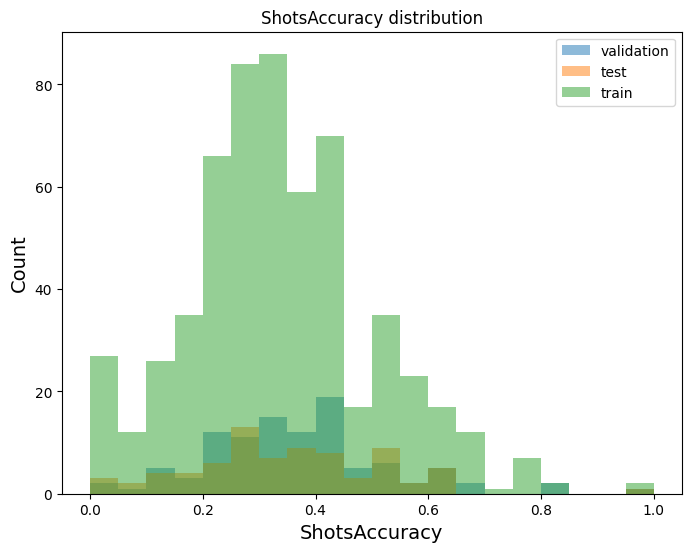

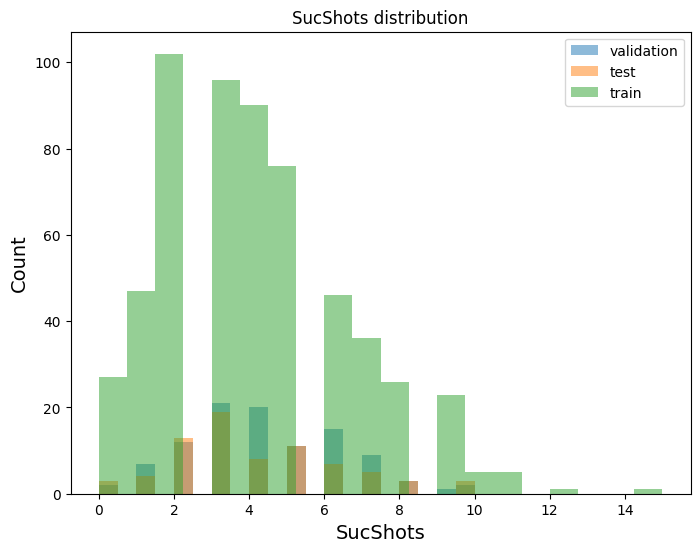

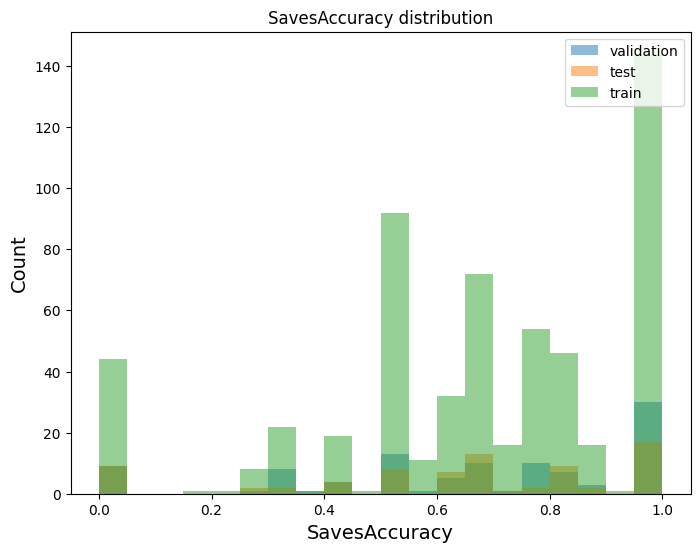

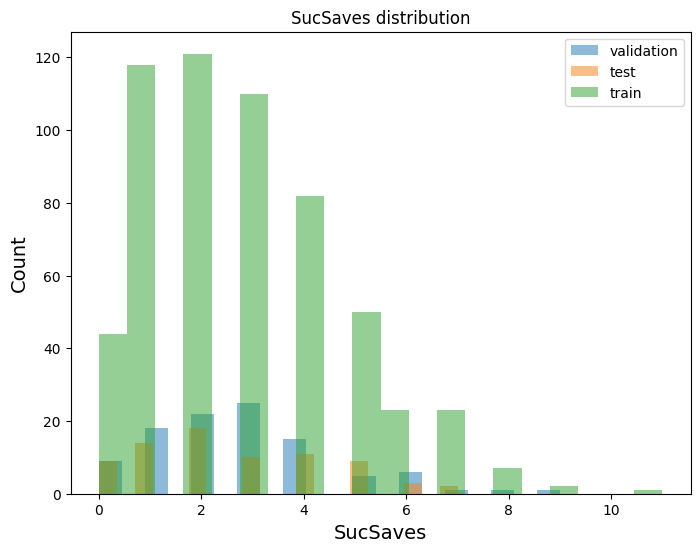

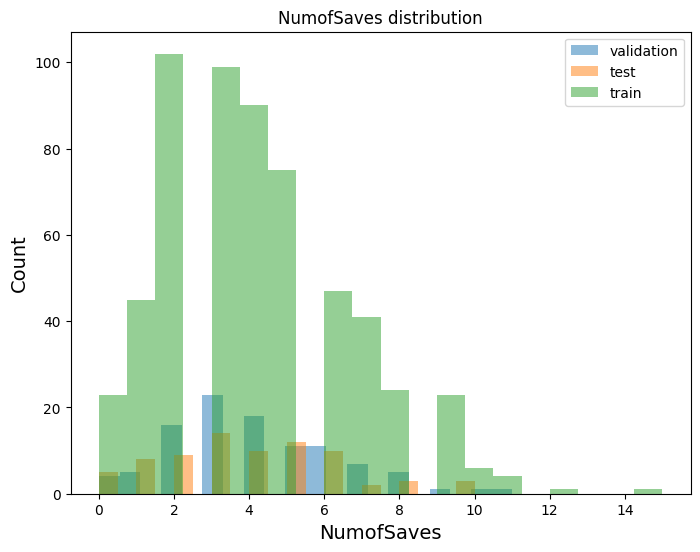

In [ ]:
import matplotlib.pyplot as plt


features = [
    'Corners', 'YellowCard', 'RedCard', 'YellowRed', 'Possession',
    'ShotsAccuracy', 'SucShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves'

]

# Creating subsets for plotting
X_test_plot = X_test[features]
X_val_plot = X_val[features]
X_train_plot = X_train[features]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()




The allocation of the dataset into training, testing, and validation sets appears appropriate. However, it's important to note that a few specific data points, particularly at the boundaries, seem to be absent in the test and validation sets for variables like 'ShotsAccuracy', 'Possession', 'SavesAccuracy', 'SucSaves', 'NumofSaves', 'Corners', 'YellowCard', 'Fouls', 'RedCard', and 'YellowRed'. This suggests that these particular data values may not be fully included in those subsets.

It's worth highlighting that the categorical variables within the dataset do not have any missing values, ensuring their consistent presence across all partitions of the data.

Linear Regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Creating linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

Predictions >

In [ ]:
# Making predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.01
Coefficient of determination: 0.44
R^2 score on tarining set = 0.43733494853141397


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.01
Coefficient of determination: 0.36
R^2 score on test set = 0.3622743736045092


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.01
Coefficient of determination: 0.24
R^2 score on validation set = 0.24109802292922144


###Tree Based model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Displaying the model's performance
mse_rf, r2_rf

(0.014486931448992846, 0.3205215238095239)

In [ ]:
# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Displaying feature importances
dict(zip(features, feature_importances))

{'Corners': 0.0868327025482615,
 'YellowCard': 0.0517939016854066,
 'RedCard': 0.0028125141878581074,
 'YellowRed': 0.0027763468419555993,
 'Possession': 0.15077735139075998,
 'ShotsAccuracy': 0.1389725380072104,
 'SucShots': 0.39717819371805724,
 'SavesAccuracy': 0.058767064763415304,
 'SucSaves': 0.03697390330094066,
 'NumofSaves': 0.07311548355613473}

###AutoML

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 49 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_bafg0y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = "https://raw.githubusercontent.com/chinm4y/csv/main/premierLeague%20-%20Sheet1.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/chinm4y/csv/main/premierLeague%20-%20Sheet1.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dff.head()

,Match_Name,Match_Date,Team,Team_Logo,Manager,Captain,Score,Penalties,Fouls,Corners,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
0,Liverpool vs. Norwich City,2019-08-09 00:00:00,Liverpool,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Jürgen Klopp,Jordan Henderson,4,0,10,11,...,0.57,0,409,521,0.47,7,15,0.83,5,6
1,Liverpool vs. Norwich City,2019-08-09 00:00:00,Norwich City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Daniel Farke,Grant Hanley,1,0,12,2,...,0.43,0,304,395,0.46,6,13,0.42,3,7
2,West Ham United vs. Manchester City,2019-08-10 00:00:00,West Ham United,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Manuel Pellegrini,Aaron Cresswell,0,0,11,1,...,0.43,0,347,428,0.60,3,5,0.50,4,8
3,West Ham United vs. Manchester City,2019-08-10 00:00:00,Manchester City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Pep Guardiola,David Silva,5,0,15,1,...,0.57,0,495,564,0.62,8,13,1.00,3,3
4,Burnley vs. Southampton,2019-08-10 00:00:00,Burnley,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Sean Dyche,Ben Mee,3,0,6,2,...,0.46,0,214,346,0.44,4,9,1.00,3,3


In [ ]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(615, 33)
(145, 33)


In [ ]:
X=df.columns
print(X)

['Match_Name', 'Match_Date', 'Team', 'Team_Logo', 'Manager', 'Captain', 'Score', 'Penalties', 'Fouls', 'Corners', 'Crosses', 'Touches', 'Tackles', 'Interceptions', 'Aerials Won', 'Clearances', 'Offsides', 'Goal Kicks', 'Throw Ins', 'Long Balls', 'YellowCard', 'RedCard', 'YellowRed', 'Possession', 'PassingAccuracy', 'SucPass', 'NumofPass', 'ShotsAccuracy', 'SucShots', 'NumofShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves']


In [ ]:
y_numeric = df['Score']  # Dependent variable
X = df.drop('Score', axis=1)  # Independent variables, removing 'Score'


print(X.columns)

['Match_Name', 'Match_Date', 'Team', 'Team_Logo', 'Manager', 'Captain', 'Penalties', 'Fouls', 'Corners', 'Crosses', 'Touches', 'Tackles', 'Interceptions', 'Aerials Won', 'Clearances', 'Offsides', 'Goal Kicks', 'Throw Ins', 'Long Balls', 'YellowCard', 'RedCard', 'YellowRed', 'Possession', 'PassingAccuracy', 'SucPass', 'NumofPass', 'ShotsAccuracy', 'SucShots', 'NumofShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves']


In [ ]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/chinm4y/csv/main/premierLeague%20-%20Sheet1.csv")

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml.train(x=X.columns, y='Score', training_frame=df_train)

AutoML progress: |
02:06:09.970: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

███
02:06:18.923: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

█
02:06:21.707: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

█
02:06:24.387: _train param, Dropping unused columns: [PassingAccuracy, Penalties]
02:06:24.802: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

██
02:06:31.476: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

█
02:06:37.184: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

██
02:06:42.696: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

█
02:06:46.459: _train param, Dropping bad and constant columns: [PassingAccuracy, Penalties]

█
02:06:50.63: _train param, Dropping unused columns: [PassingAccuracy, Penalties]
02:06:50.360: _train param, Dropping unused columns: [

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/12
# GBM base models (used / total),0/5
# XGBoost base models (used / total),3/3
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml.leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20240318_20609     0.925536  0.856616  0.723383  0.417547                  0.856616
StackedEnsemble_AllModels_1_AutoML_1_20240318_20609     0.92758   0.860404  0.724226  0.418972                  0.860404
StackedEnsemble_BestOfFamily_4_AutoML_1_20240318_20609  0.927832  0.860871  0.726977  0.419085                  0.860871
StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_20609  0.928328  0.861793  0.727582  0.419229                  0.861793
StackedEnsemble_BestOfFamily_3_AutoML_1_20240318_20609  0.929703  0.864348  0.728503  0.420042                  0.864348
StackedEnsemble_AllModels_3_AutoML_1_20240318_20609     0.934446  0.873189  0.727589  0.422022                  0.873189
GLM_1_AutoML_1_20240318_20609                           0.936558  0.877142  0.735852  0.42791                   0.877142
StackedEnsemble_BestOfFamily_1_A

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['Corners', 'YellowCard', 'RedCard', 'YellowRed', 'Possession',
    'ShotsAccuracy', 'SucShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves', 'Fouls', 'Long Balls']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Corners,5.576836
1,YellowCard,3.471497
2,RedCard,1.066909
3,YellowRed,1.067518
4,Possession,17.209990
5,ShotsAccuracy,9.694149
6,SucShots,9.188415
7,SavesAccuracy,12.545785
8,SucSaves,28.834694
9,NumofSaves,25.071898


In [ ]:
columns_to_drop = ['Match_Name', 'Match_Date', 'Team', 'Team_Logo', 'Manager', 'Captain', 'Penalties', 'Crosses' ,'Touches','Tackles', 'Interceptions','Aerials Won','Clearances','Offsides','Goal Kicks','Throw Ins','Long Balls', 'YellowRed', 'Possession', 'PassingAccuracy','NumofPass','NumofShots', 'SucPass','ShotsAccuracy', 'SavesAccuracy', 'Fouls']

# Dropping the specified columns from the H2OFrame
df1 = df.drop(columns_to_drop, axis=1)


In [ ]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:
X1=df1.columns
print(X1)

['Score', 'Corners', 'YellowCard', 'RedCard', 'SucShots', 'SucSaves', 'NumofSaves']


In [ ]:
y1_numeric ='Score'
X1.remove(y1_numeric)
print(X1)

['Corners', 'YellowCard', 'RedCard', 'SucShots', 'SucSaves', 'NumofSaves']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml1.leaderboard)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20240318_21155  0.960286  0.922148  0.736808  0.419651                  0.922148
GLM_1_AutoML_2_20240318_21155                           0.964173  0.929629  0.740197  0.426453                  0.929629
StackedEnsemble_BestOfFamily_1_AutoML_2_20240318_21155  0.968434  0.937865  0.742687  0.427298                  0.937865
DeepLearning_grid_1_AutoML_2_20240318_21155_model_3     0.970765  0.942385  0.753234  0.429243                  0.942385
StackedEnsemble_BestOfFamily_2_AutoML_2_20240318_21155  0.971575  0.943959  0.745913  0.426878                  0.943959
StackedEnsemble_AllModels_3_AutoML_2_20240318_21155     0.974659  0.949961  0.744722  0.425255                  0.949961
StackedEnsemble_AllModels_2_AutoML_2_20240318_21155     0.975946  0.95247   0.746559  0.426059                  0.95247
DeepLearning_grid_1_AutoML_2_2024

In [ ]:
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_BestOfFamily_4_AutoML_2_20240318_21155': 0,
 'GLM_1_AutoML_2_20240318_21155': 1}

In [ ]:
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

1


In [ ]:
best_model1.algo

'glm'

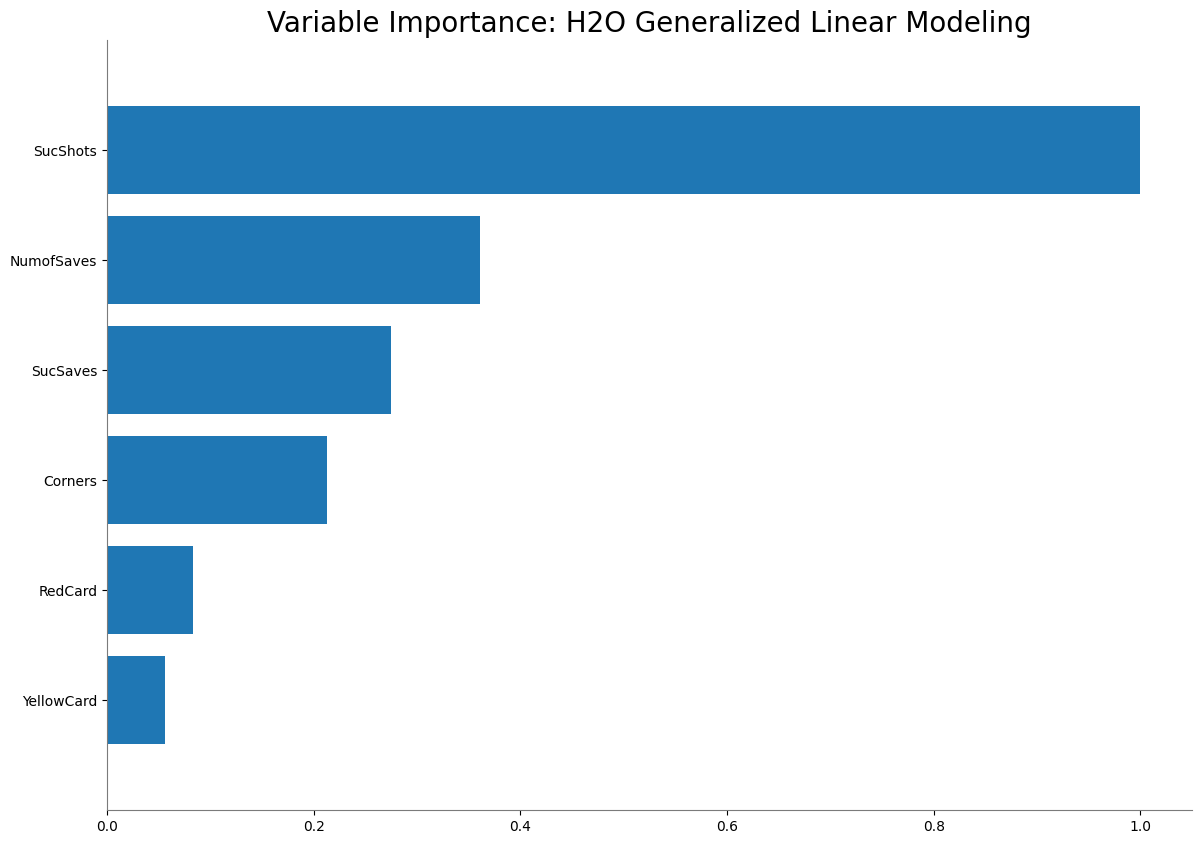

<Figure size 640x480 with 0 Axes>

In [ ]:
if best_model1.algo in ['glm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-55-1288b2406fe1>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


1
glm


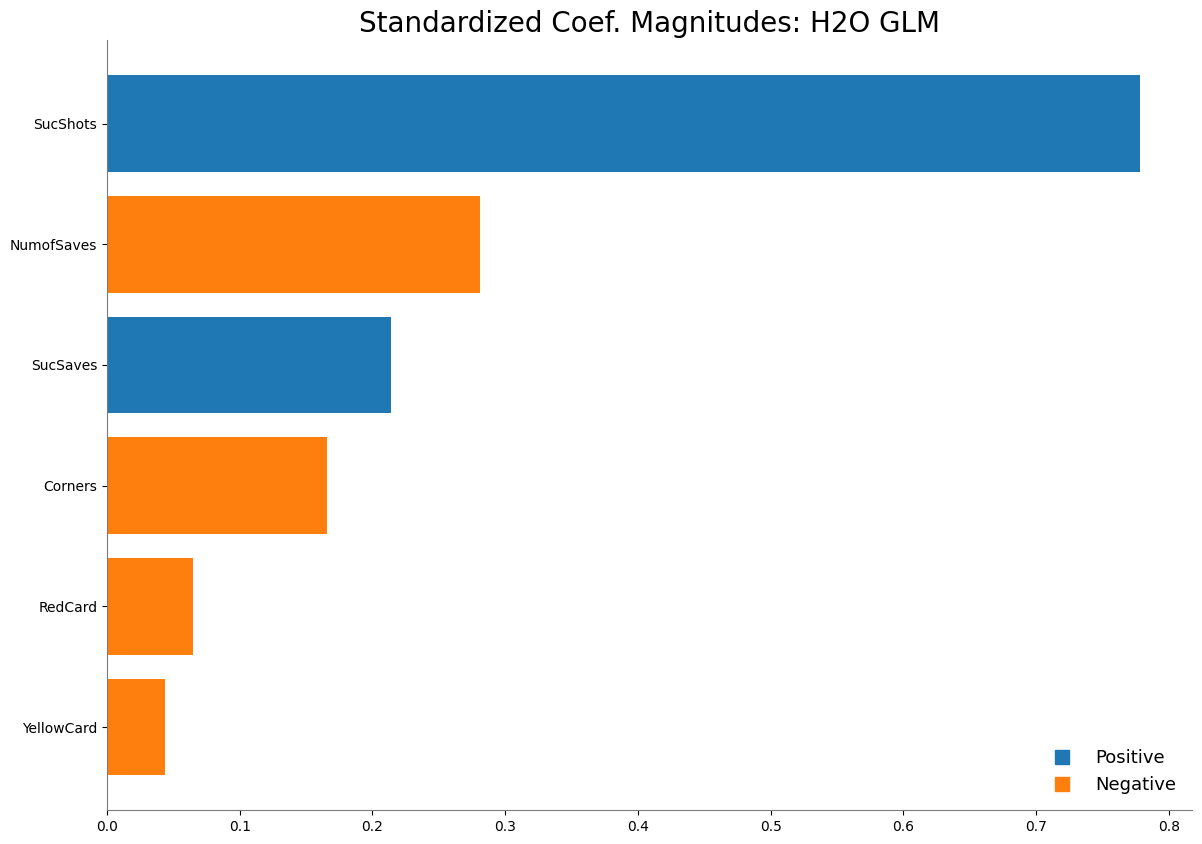

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

In [ ]:
# Assuming df1 is your H2OFrame that includes both features and "Score"
train, test = df1.split_frame(ratios=[0.8], seed=42)  # 80% training, 20% testing

# Now, separate features and target in both training and testing sets
A_train = train.drop(['Score'], axis=1)
B_train = train['Score']

A_test = test.drop(['Score'], axis=1)
B_test = test['Score']


In [ ]:
A_train_pd = A_train.as_data_frame()
B_train_pd = B_train.as_data_frame()

# Now, ensure you select the correct columns from the pandas DataFrame
cols1 = ['Corners', 'YellowCard', 'RedCard', 'SucShots', 'SucSaves', 'NumofSaves']
model1 = sm.OLS(B_train_pd, sm.add_constant(A_train_pd[cols1])).fit()

# Print the summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     68.36
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.70e-64
Time:                        02:20:01   Log-Likelihood:                -816.70
No. Observations:                 598   AIC:                             1647.
Df Residuals:                     591   BIC:                             1678.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6768      0.140      4.823      0.0

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

In [ ]:
predictions = aml.leader.predict(test)
print(predictions)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
 0.834437
 0.836504
 0.911466
 1.44124
 0.924677
 1.82873
 1.18444
 0.861155
 1.14072
 1.79882
[162 rows x 1 column]



/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Match_Name': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Match_Date': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Team': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Team_Logo': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Manager': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Captain': substituting i

##SHAP ANALYSIS

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.7 MB/s eta 0:00:00


SHAP for RF

In [ ]:
import shap
shap.initjs()


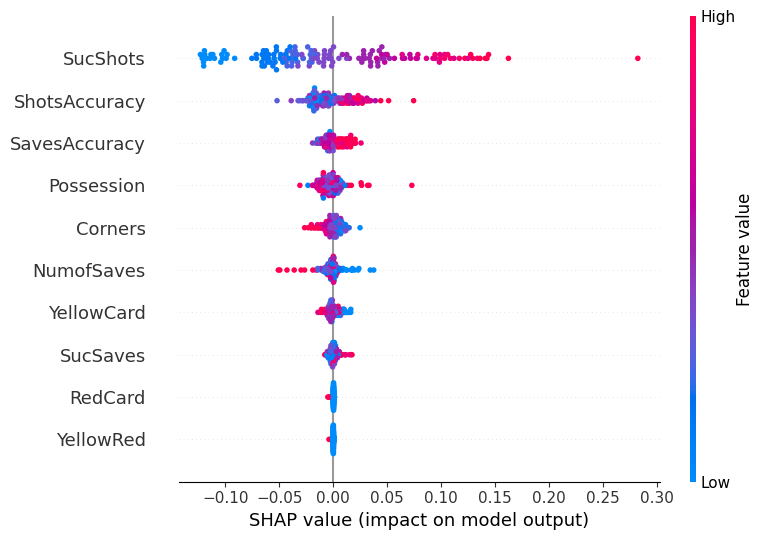

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

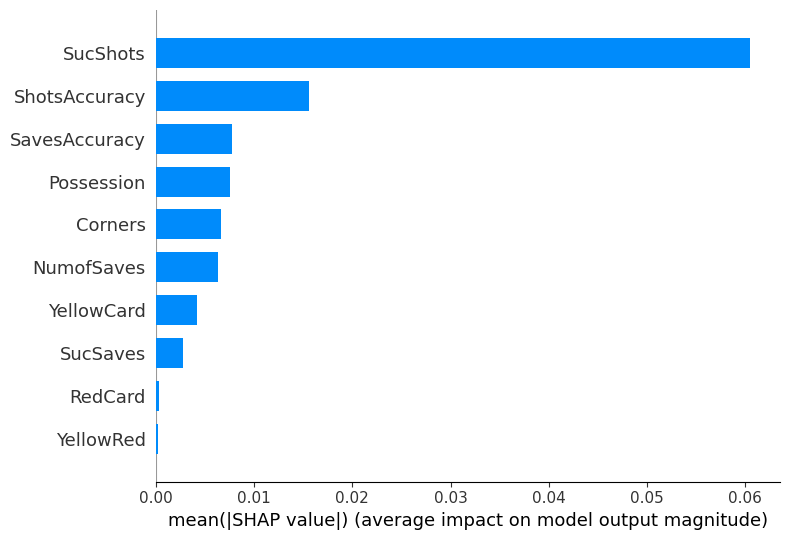

In [ ]:
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Generate a summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')

SHAP for LR

  0%|          | 0/152 [00:00<?, ?it/s]

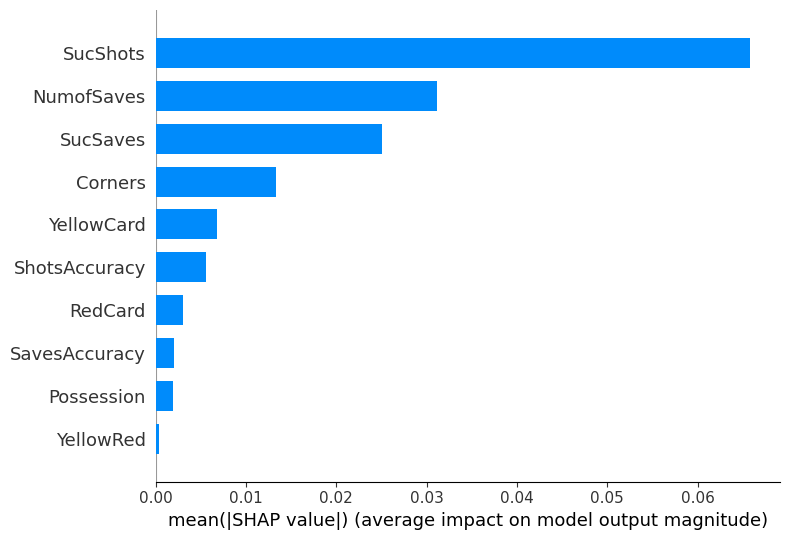

In [ ]:
background = X_train.sample(100)  # Using a sample of the training data for efficiency
explainer = shap.KernelExplainer(linear_model.predict, background)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Generate a summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')

SHAP for AUTOML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 7 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_bafg0y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.035 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
hf_pandas = hf.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
def model_predict(data_as_array):
    # Convert the input array back to an H2OFrame
    hf_data = h2o.H2OFrame(data_as_array)
    # Make predictions with the H2O model
    predictions = best_model.predict(hf_data)
    # Convert predictions back to an array and return
    return predictions.as_data_frame().values

In [ ]:
import shap
import numpy as np

In [ ]:
if 'const' not in X_shap.columns:
    X_shap = sm.add_constant(X_shap)

In [ ]:
coefficients = model1.params.values

In [ ]:
background_data = X_shap.mean().values.reshape(1, -1)

In [ ]:
explainer = shap.LinearExplainer((coefficients, model1.bse.values), background_data)

In [ ]:
shap_values = explainer.shap_values(X_shap)

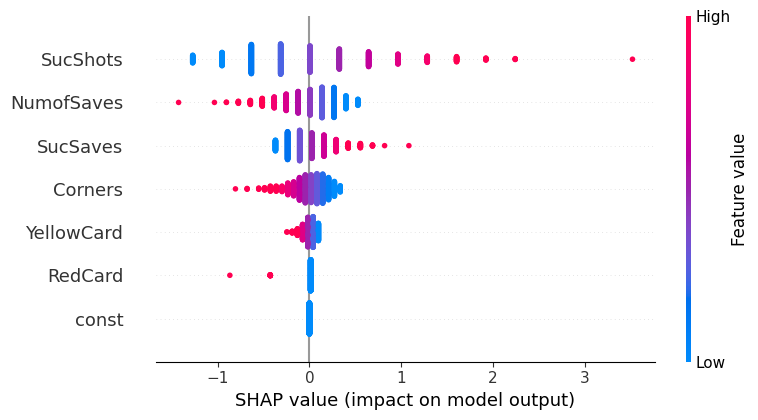

In [ ]:
shap.summary_plot(shap_values, X_shap)

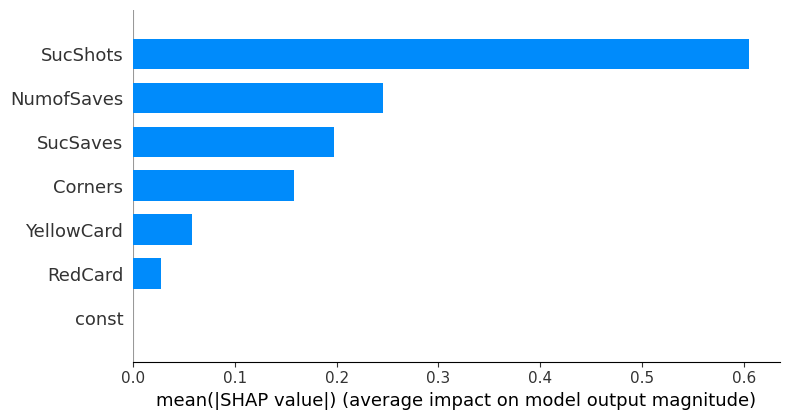

In [ ]:
shap.summary_plot(shap_values, X_shap, plot_type='bar')

###References:
https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb
Lundberg, S.M., & Lee, S.-I. (2017). A Unified Approach to Interpreting Model Predictions. In Advances in Neural Information Processing Systems 30
Štrumbelj, E., & Kononenko, I. (2014). Explaining prediction models and individual predictions with feature contributions. Knowledge and Information Systems, 41(3), 647-665.

###License:
LICENSE for this notebook (Chinmay_Deshpande) https://raw.githubusercontent.com/chinm4y/DSMNT_Chinmay/main/LICENSE

impyute 3.7 by Elton Law https://impyute.readthedocs.io/en/master/user_guide/getting_started.html#versions Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html sklearn.LinearRegression, GridSearch https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html